In [58]:
import ase.io
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [59]:
## get mappings of sid (a random number) to systems (adslabs) that are in the OC20 dataset 
with open("oc20_data_mapping.pkl", "rb") as input_file:
    mappings = pickle.load(input_file)
# load the OC20 reference energies
with open("oc20_ref.pkl", "rb") as input_file:
    ref_energies = pickle.load(input_file)
# load the mapping from an adslab sid to a slab sid
with open("mapping_adslab_slab.pkl", "rb") as input_file:
    adslab_slab_mappings = pickle.load(input_file)

# Val-ID 
## Total energy predictions

In [60]:
df_val_id = pd.read_csv("is2re_val_sets/is2re_val_id.csv", index_col=0)
df_val_id

,sid,dft_adsorption_energy,dft_slab_energy,dft_adsorbate_energy,dft_total_energies,ml_relax_slab_energy,ml_relax_total_energy,surface_anomalies,direct_ml_relax_ads_energy
0,1700380,-0.401909,-262.986352,-23.120,-286.509224,-263.170,-286.628,0,-0.378
1,2320054,-3.992470,-842.315780,-31.949,-878.257892,-842.393,-878.610,0,-4.187
2,662687,0.920258,-763.037847,-25.718,-787.836557,-763.007,-793.112,0,-4.415
3,1924657,0.992241,-266.865661,-16.166,-282.039847,-267.077,-282.588,1,0.631
4,1507405,-0.051427,-173.036448,-10.681,-183.769094,-172.857,-183.710,0,-0.070
...,...,...,...,...,...,...,...,...,...
24938,1758896,2.426782,-315.964859,-15.287,-328.825241,-315.774,-328.585,1,1.308
24939,2497754,1.882087,-423.091313,-26.847,-448.056871,-423.217,-447.155,0,1.701
24940,1471951,-1.612726,-665.399468,-21.440,-688.452331,-665.413,-688.489,0,-1.663
24941,471031,1.814543,-705.581288,-30.324,-734.091658,-705.601,-734.032,0,1.756


In [61]:
val_id_adslab_mae  = np.mean(np.abs(df_val_id["ml_relax_total_energy"] - \
                                   df_val_id["dft_total_energies"]))
val_id_slab_mae = np.mean(np.abs(df_val_id["ml_relax_slab_energy"] - df_val_id["dft_slab_energy"]))

In [62]:
# Full ML adsorption energy
df_val_id["ads_energy_pred_ml_relax"] =df_val_id["ml_relax_total_energy"] - \
                                df_val_id["ml_relax_slab_energy"] - \
                                df_val_id["dft_adsorbate_energy"]
val_id_ml_relax_ads_mae = np.mean(np.abs(df_val_id["dft_adsorption_energy"] - 
                                         df_val_id["ads_energy_pred_ml_relax"]))
val_id_ml_relax_ads_mae

0.3835631842193586

## OOD Ads

In [63]:
df_ood_ads = pd.read_csv("is2re_val_sets/is2re_val_ood_ads.csv", index_col=0)
df_ood_ads

,sid,dft_adsorption_energy,dft_slab_energy,dft_adsorbate_energy,dft_total_energies,ml_relax_slab_energy,ml_relax_total_energy,surface_anomalies,direct_ml_relax_ads_energy
0,1930510,-2.826377,-101.264936,-17.963,-122.054183,-101.459,-122.233,0,-2.803
1,1729668,1.307682,-473.706973,-17.963,-490.362160,-474.059,-490.891,0,1.242
2,710795,-1.009515,-754.430057,-10.759,-766.198491,-754.474,-766.239,0,-1.028
3,1904318,-1.053289,-21.711892,-15.037,-37.802931,-21.749,-37.827,0,-1.065
4,455640,3.714117,-442.394172,-25.968,-464.648437,-442.211,-465.149,1,3.065
...,...,...,...,...,...,...,...,...,...
24956,1670661,-1.797060,-300.947318,-15.037,-317.782127,-300.488,-317.514,0,-2.058
24957,714182,-1.844538,-155.935213,-17.963,-175.742621,-155.788,-175.592,0,0.025
24958,1728610,-0.299678,-453.185840,-10.759,-464.244437,-453.689,-464.594,1,-0.414
24959,614554,-4.340534,-1117.121880,-58.546,-1180.010287,-1116.800,-1179.597,0,-4.157


In [64]:
val_ood_ads_adslab_mae  = np.mean(np.abs(df_ood_ads["ml_relax_total_energy"] - \
                                   df_ood_ads["dft_total_energies"]))
val_ood_ads_slab_mae = np.mean(np.abs(df_ood_ads["ml_relax_slab_energy"] - df_ood_ads["dft_slab_energy"]))

In [65]:
# Full ML adsorption energy
df_ood_ads["ads_energy_pred_ml_relax"] =df_ood_ads["ml_relax_total_energy"] - \
                                df_ood_ads["ml_relax_slab_energy"] - \
                                df_ood_ads["dft_adsorbate_energy"]
val_ood_ads_ml_relax_ads_mae = np.mean(np.abs(df_ood_ads["dft_adsorption_energy"] - 
                                              df_ood_ads["ads_energy_pred_ml_relax"]))
val_ood_ads_ml_relax_ads_mae

0.4085411230913868

## OOD Cat

In [66]:
df_ood_cat = pd.read_csv("is2re_val_sets/is2re_val_ood_cat.csv", index_col=0)
df_ood_cat

,sid,dft_adsorption_energy,dft_slab_energy,dft_adsorbate_energy,dft_total_energies,ml_relax_slab_energy,ml_relax_total_energy,surface_anomalies,direct_ml_relax_ads_energy
0,964457,0.189052,-532.199081,-35.926,-567.935768,-532.663,-569.969,0,-0.986
1,2171563,-1.762883,-741.810916,-11.560,-755.134281,-742.244,-755.503,0,-1.610
2,2483979,-2.179446,-226.558383,-28.722,-257.459618,-226.879,-258.385,0,-3.032
3,2129454,-0.524066,-782.448166,-16.166,-799.138659,-781.832,-798.322,0,-0.536
4,1804653,1.405711,-432.385339,-10.681,-441.660847,-429.669,-438.816,0,1.513
...,...,...,...,...,...,...,...,...,...
24958,1638018,4.145774,-148.964775,-18.764,-163.583433,-148.804,-164.596,0,2.896
24959,1885680,4.251310,-347.094820,-44.982,-387.825740,-347.299,-388.548,1,3.974
24960,2186953,-2.622036,-489.020658,-35.926,-527.568434,-489.074,-527.426,0,-2.582
24961,506877,-0.589995,-442.812930,-19.643,-463.046619,-444.222,-464.423,0,-0.895


In [67]:
val_ood_cat_adslab_mae  = np.mean(np.abs(df_ood_cat["ml_relax_total_energy"] - \
                                   df_ood_cat["dft_total_energies"]))
val_ood_cat_slab_mae = np.mean(np.abs(df_ood_cat["ml_relax_slab_energy"] - df_ood_cat["dft_slab_energy"]))

In [68]:
# Full ML adsorption energy
df_ood_cat["ads_energy_pred_ml_relax"] =df_ood_cat["ml_relax_total_energy"] - \
                                df_ood_cat["ml_relax_slab_energy"] - \
                                df_ood_cat["dft_adsorbate_energy"]
val_ood_cat_ml_relax_ads_mae = np.mean(np.abs(df_ood_cat["dft_adsorption_energy"] - 
                                              df_ood_cat["ads_energy_pred_ml_relax"]))
val_ood_cat_ml_relax_ads_mae

0.38432339589679376

# Val-OOD-Both 

In [69]:
df_ood_both = pd.read_csv("is2re_val_sets/is2re_val_ood_both.csv", index_col=0)
df_ood_both

,sid,dft_adsorption_energy,dft_slab_energy,dft_adsorbate_energy,dft_total_energy,dft_total_energies,ml_relax_slab_energy,ml_relax_total_energy,surface_anomalies,direct_ml_relax_ads_energy
0,2574092,-1.500569,-454.363499,-17.963,-473.827068,-473.826938,-454.427,-474.543,0,-1.415
1,2522358,-2.846116,-791.380293,-17.963,-812.189409,-812.189278,-791.825,-812.799,0,-3.055
2,2543745,-1.470944,-594.536624,-58.546,-654.553568,-654.555441,-590.028,-650.492,1,-3.089
3,2573082,-5.303689,-501.782502,-39.403,-546.489191,-546.489199,-501.864,-546.732,0,-5.454
4,2540810,1.946157,-762.299612,-15.037,-775.390456,-775.391205,-762.596,-778.075,0,1.179
...,...,...,...,...,...,...,...,...,...,...
24982,2009063,-0.577668,-195.153672,-17.963,-213.694340,-213.694210,-194.712,-213.301,0,-0.710
24983,2541962,0.087245,-391.756850,-17.963,-409.632605,-409.632475,-391.930,-409.870,0,-1.102
24984,2530077,-1.052784,-436.723385,-17.963,-455.739169,-455.739038,-437.884,-456.828,0,-1.075
24985,1445329,-4.045752,-704.474586,-58.546,-767.066337,-767.068210,-704.124,-766.713,0,-3.968


In [70]:
val_ood_both_adslab_mae  = np.mean(np.abs(df_ood_both["ml_relax_total_energy"] - \
                                   df_ood_both["dft_total_energies"]))
val_ood_both_slab_mae = np.mean(np.abs(df_ood_both["ml_relax_slab_energy"] - df_ood_both["dft_slab_energy"]))

In [71]:
# Full ML adsorption energy
df_ood_both["ads_energy_pred_ml_relax"] =df_ood_both["ml_relax_total_energy"] - \
                                df_ood_both["ml_relax_slab_energy"] - \
                                df_ood_both["dft_adsorbate_energy"]
val_ood_both_ml_relax_ads_mae = np.mean(np.abs(df_ood_both["dft_adsorption_energy"] - 
                                               df_ood_both["ads_energy_pred_ml_relax"]))
val_ood_both_ml_relax_ads_mae

0.3508385108368365

In [72]:
names = ["Val-ID", "Val-OOD-Ads", "Val-OOD-Cat", "Val-OOD-Both"]
val_total_maes = [val_id_adslab_mae,val_ood_ads_adslab_mae,val_ood_cat_adslab_mae,val_ood_both_adslab_mae]
val_slab_maes = [val_id_slab_mae,val_ood_ads_slab_mae,val_ood_cat_slab_mae,val_ood_both_slab_mae]
val_ml_ads_maes = [val_id_ml_relax_ads_mae,val_ood_ads_ml_relax_ads_mae,
                   val_ood_cat_ml_relax_ads_mae,val_ood_both_ml_relax_ads_mae]
data = {
    names[i]: [val_total_maes[i], val_slab_maes[i],val_ml_ads_maes[i] ] for i in range(len(names))
}

df = pd.DataFrame(data, index = ["total energy", "slab energy", "ML relax ads energy"])
df.round(4)

,Val-ID,Val-OOD-Ads,Val-OOD-Cat,Val-OOD-Both
total energy,0.3439,0.3713,0.6297,0.6370
slab energy,0.2064,0.2075,0.5295,0.5409
ML relax ads energy,0.3836,0.4085,0.3843,0.3508


In [74]:
## MAE distribution of the MAEs
for df in [df_val_id,df_ood_cat,df_ood_ads,df_ood_both]:
    material_classes = []
    for i in tqdm(df["sid"].values):
        sid = "random"+str(i)
        material_classes.append(mappings[sid]["class"])
    material_classes = np.array(material_classes)
    # add system information to the dataframe
    df["cat_class"] = material_classes

100%|██████████| 24987/24987 [00:00<00:00, 547148.82it/s]


In [75]:
# regenrate the figure in Adeesh's paper on about the ML errors across the material classes
val_id_dict = {}
for material in [0,1,2,3]:
    val_id_dict[material] = np.mean(np.abs(df_val_id.query(f"cat_class=={material}")["ads_energy_pred_ml_relax"] \
                                             - df_val_id.query(f"cat_class=={material}")["dft_adsorption_energy"]))
val_ood_ads_dict = {}
for material in [0,1,2,3]:
    val_ood_ads_dict[material] = np.mean(np.abs(df_ood_ads.query(f"cat_class=={material}")["ads_energy_pred_ml_relax"] \
                                             - df_ood_ads.query(f"cat_class=={material}")["dft_adsorption_energy"]))
val_ood_cat_dict = {}
for material in [0,1,2,3]:
    val_ood_cat_dict[material] = np.mean(np.abs(df_ood_cat.query(f"cat_class=={material}")["ads_energy_pred_ml_relax"] \
                                             - df_ood_cat.query(f"cat_class=={material}")["dft_adsorption_energy"]))
val_ood_both_dict = {}
for material in [0,1,2,3]:
    val_ood_both_dict[material] = np.mean(np.abs(df_ood_both.query(f"cat_class=={material}")["ads_energy_pred_ml_relax"] \
                                             - df_ood_both.query(f"cat_class=={material}")["dft_adsorption_energy"]))

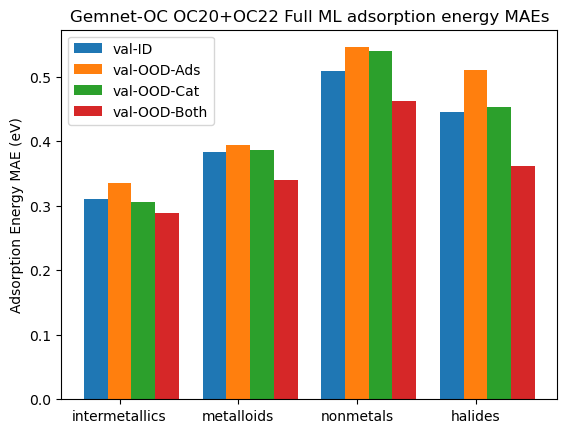

In [76]:
# Extract labels and mean values
materials = ["intermetallics", "metalloids", "nonmetals", "halides"]
labels = list(val_id_dict.keys())
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, list(val_id_dict.values()), width, label='val-ID')
rects2 = ax.bar(x, list(val_ood_ads_dict.values()), width, label='val-OOD-Ads')
rects3 = ax.bar(x + width, list(val_ood_cat_dict.values()), width, label='val-OOD-Cat')
rects4 = ax.bar(x + 2*width, list(val_ood_both_dict.values()), width, label='val-OOD-Both')

# Add legend
ax.legend()

# Add labels and title
ax.set_ylabel('Adsorption Energy MAE (eV)')
ax.set_title('Gemnet-OC OC20+OC22 Full ML adsorption energy MAEs')
ax.set_xticks(x)
ax.set_xticklabels(materials)

plt.show()

## Direct adsorption energy MAEs

In [77]:
# load the is2re val sets with the DFT energies
df_val_id = pd.read_csv("is2re_val_sets/is2re_val_id.csv", index_col=0)
df_ood_ads = pd.read_csv("is2re_val_sets/is2re_val_ood_ads.csv", index_col=0)
df_ood_cat = pd.read_csv("is2re_val_sets/is2re_val_ood_cat.csv", index_col=0)
df_ood_both = pd.read_csv("is2re_val_sets/is2re_val_ood_both.csv", index_col=0)

## Val-ID

In [78]:
val_id_ads_mae = np.mean(np.abs(df_val_id["dft_adsorption_energy"] - df_val_id["direct_ml_relax_ads_energy"]))
val_id_ads_mae

0.3345359714649397

In [79]:
# no reconstructions
val_id_ads_mae_anom = np.mean(np.abs(df_val_id.query("surface_anomalies==0")["dft_adsorption_energy"] -  
                                      df_val_id.query("surface_anomalies==0")["direct_ml_relax_ads_energy"]))
val_id_ads_mae_anom

0.2951394250978059

## Val-OOD-Ads

In [80]:
val_ood_ads_ads_mae = np.mean(np.abs(df_ood_ads["dft_adsorption_energy"] - df_ood_ads["direct_ml_relax_ads_energy"]))
val_ood_ads_ads_mae

0.364400067266934

In [81]:
val_ood_ads_ads_mae_anom = np.mean(np.abs(df_ood_ads.query("surface_anomalies==0")["dft_adsorption_energy"] 
                                     - df_ood_ads.query("surface_anomalies==0")["direct_ml_relax_ads_energy"]))
val_ood_ads_ads_mae_anom

0.32174603154126846

## Val-OOD-Cat

In [82]:
val_ood_cat_ads_mae = np.mean(np.abs(df_ood_cat["dft_adsorption_energy"] - df_ood_cat["direct_ml_relax_ads_energy"]))
val_ood_cat_ads_mae

0.38513694671715343

In [83]:
val_ood_cat_ads_mae_anom = np.mean(np.abs(df_ood_cat.query("surface_anomalies==0")["dft_adsorption_energy"] - 
                                     df_ood_cat.query("surface_anomalies==0")["direct_ml_relax_ads_energy"]))
val_ood_cat_ads_mae_anom

0.3333220986679203

## Val-OOD-Both

In [84]:
val_ood_both_ads_mae = np.mean(np.abs(df_ood_both["dft_adsorption_energy"] - df_ood_both["direct_ml_relax_ads_energy"]))
val_ood_both_ads_mae

0.35363107546343975

In [85]:
val_ood_both_ads_mae_anom = np.mean(np.abs(df_ood_both.query("surface_anomalies==0")["dft_adsorption_energy"] - 
                                      df_ood_both.query("surface_anomalies==0")["direct_ml_relax_ads_energy"]))
val_ood_both_ads_mae_anom

0.3257537960731673

In [86]:
names = ["Val-ID", "Val-OOD-Ads", "Val-OOD-Cat", "Val-OOD-Both"]
val_ads_maes = [val_id_ads_mae,val_ood_ads_ads_mae,val_ood_cat_ads_mae,val_ood_both_ads_mae]
val_ads_maes_anom = [val_id_ads_mae_anom,val_ood_ads_ads_mae_anom,
                     val_ood_cat_ads_mae_anom,val_ood_both_ads_mae_anom]

In [87]:
data = {
    names[i]: [val_ads_maes[i], val_ads_maes_anom[i]] for i in range(len(names))
}

df = pd.DataFrame(data, index = ["original", "without anomalies"])
df

,Val-ID,Val-OOD-Ads,Val-OOD-Cat,Val-OOD-Both
original,0.334536,0.364400,0.385137,0.353631
without anomalies,0.295139,0.321746,0.333322,0.325754


In [88]:
## MAE distribution of the MAEs
for df in [df_val_id,df_ood_cat,df_ood_ads,df_ood_both]:
    material_classes = []
    for i in tqdm(df["sid"].values):
        sid = "random"+str(i)
        material_classes.append(mappings[sid]["class"])
    material_classes = np.array(material_classes)
    # add system information to the dataframe
    df["cat_class"] = material_classes

100%|██████████| 24987/24987 [00:00<00:00, 349503.19it/s]


In [89]:
# regenrate the figure in Adeesh's paper on about the ML errors across the material classes
val_id_dict = {}
for material in [0,1,2,3]:
    val_id_dict[material] = np.mean(np.abs(df_val_id.query(f"cat_class=={material}")["direct_ml_relax_ads_energy"] \
                                             - df_val_id.query(f"cat_class=={material}")["dft_adsorption_energy"]))
val_ood_ads_dict = {}
for material in [0,1,2,3]:
    val_ood_ads_dict[material] = np.mean(np.abs(df_ood_ads.query(f"cat_class=={material}")["direct_ml_relax_ads_energy"] \
                                             - df_ood_ads.query(f"cat_class=={material}")["dft_adsorption_energy"]))
val_ood_cat_dict = {}
for material in [0,1,2,3]:
    val_ood_cat_dict[material] = np.mean(np.abs(df_ood_cat.query(f"cat_class=={material}")["direct_ml_relax_ads_energy"] \
                                             - df_ood_cat.query(f"cat_class=={material}")["dft_adsorption_energy"]))
val_ood_both_dict = {}
for material in [0,1,2,3]:
    val_ood_both_dict[material] = np.mean(np.abs(df_ood_both.query(f"cat_class=={material}")["direct_ml_relax_ads_energy"] \
                                             - df_ood_both.query(f"cat_class=={material}")["dft_adsorption_energy"]))

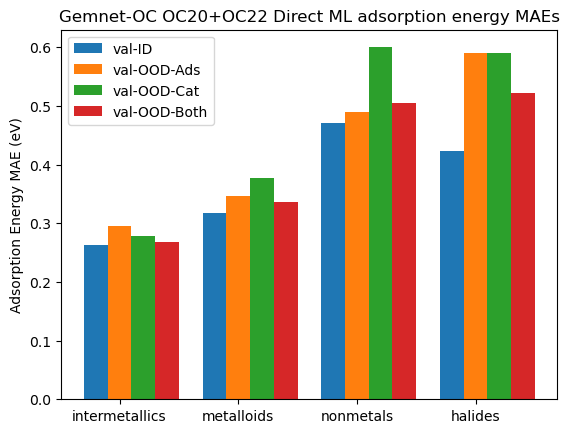

In [91]:
# Extract labels and mean values
materials = ["intermetallics", "metalloids", "nonmetals", "halides"]
labels = list(val_id_dict.keys())
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, list(val_id_dict.values()), width, label='val-ID')
rects2 = ax.bar(x, list(val_ood_ads_dict.values()), width, label='val-OOD-Ads')
rects3 = ax.bar(x + width, list(val_ood_cat_dict.values()), width, label='val-OOD-Cat')
rects4 = ax.bar(x + 2*width, list(val_ood_both_dict.values()), width, label='val-OOD-Both')

# Add legend
ax.legend()

# Add labels and title
ax.set_ylabel('Adsorption Energy MAE (eV)')
ax.set_title('Gemnet-OC OC20+OC22 Direct ML adsorption energy MAEs')
ax.set_xticks(x)
ax.set_xticklabels(materials)

plt.show()

## Without surface reconstructions: 

In [93]:
# regenrate the figure in Adeesh's paper on about the ML errors across the material classes
val_id_dict = {}
for material in [0,1,2,3]:
    val_id_dict[material] = np.mean(np.abs(df_val_id.query(f"cat_class=={material}&surface_anomalies==0")["direct_ml_relax_ads_energy"] \
                                             - df_val_id.query(f"cat_class=={material}&surface_anomalies==0")["dft_adsorption_energy"]))
val_ood_ads_dict = {}
for material in [0,1,2,3]:
    val_ood_ads_dict[material] = np.mean(np.abs(df_ood_ads.query(f"cat_class=={material}&surface_anomalies==0")["direct_ml_relax_ads_energy"] \
                                             - df_ood_ads.query(f"cat_class=={material}&surface_anomalies==0")["dft_adsorption_energy"]))
val_ood_cat_dict = {}
for material in [0,1,2,3]:
    val_ood_cat_dict[material] = np.mean(np.abs(df_ood_cat.query(f"cat_class=={material}&surface_anomalies==0")["direct_ml_relax_ads_energy"] \
                                             - df_ood_cat.query(f"cat_class=={material}&surface_anomalies==0")["dft_adsorption_energy"]))
val_ood_both_dict = {}
for material in [0,1,2,3]:
    val_ood_both_dict[material] = np.mean(np.abs(df_ood_both.query(f"cat_class=={material}&surface_anomalies==0")["direct_ml_relax_ads_energy"] \
                                             - df_ood_both.query(f"cat_class=={material}&surface_anomalies==0")["dft_adsorption_energy"]))

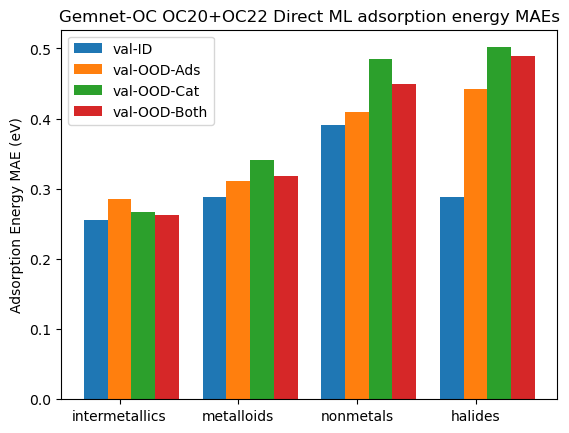

In [94]:
# Extract labels and mean values
materials = ["intermetallics", "metalloids", "nonmetals", "halides"]
labels = list(val_id_dict.keys())
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, list(val_id_dict.values()), width, label='val-ID')
rects2 = ax.bar(x, list(val_ood_ads_dict.values()), width, label='val-OOD-Ads')
rects3 = ax.bar(x + width, list(val_ood_cat_dict.values()), width, label='val-OOD-Cat')
rects4 = ax.bar(x + 2*width, list(val_ood_both_dict.values()), width, label='val-OOD-Both')

# Add legend
ax.legend()

# Add labels and title
ax.set_ylabel('Adsorption Energy MAE (eV)')
ax.set_title('Gemnet-OC OC20+OC22 Direct ML adsorption energy MAEs')
ax.set_xticks(x)
ax.set_xticklabels(materials)

plt.show()